In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
model=KNeighborsClassifier()

In [7]:
df=pd.read_csv('j:/data_science/csv/data/gender_height_weight.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X=df.iloc[:,[1,2]]
y=df.Gender
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [13]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [23]:
y_pred=model.predict(X_test)
y_pred

array(['Female', 'Female', 'Female', ..., 'Male', 'Female', 'Male'],
      dtype=object)

In [17]:
model.score(X_test,y_test)

0.9076

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay,recall_score,classification_report

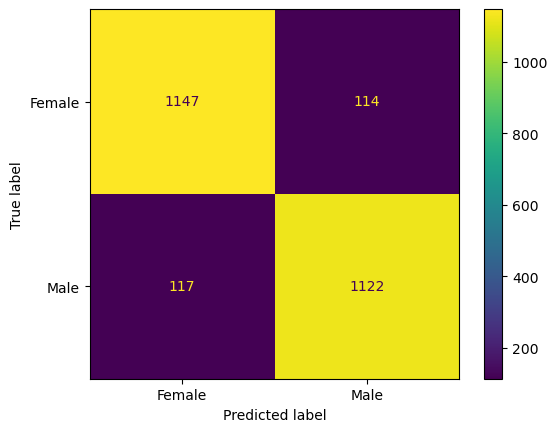

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Female       0.91      0.91      0.91      1261
        Male       0.91      0.91      0.91      1239

    accuracy                           0.91      2500
   macro avg       0.91      0.91      0.91      2500
weighted avg       0.91      0.91      0.91      2500



In [29]:
k=np.array([10,20,30,40,50])
(10-10)/(50-10)

0.0

In [31]:
(50-10)/(50-10)

1.0

In [33]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [37]:
ms=MinMaxScaler()
ms.fit_transform(k.reshape(-1,1))

array([[0.  ],
       [0.25],
       [0.5 ],
       [0.75],
       [1.  ]])

In [39]:
sc=StandardScaler() #Z score normalization  each point how much  standard deviation far away from mean
#mean=0
#std=1

In [41]:
sc.fit_transform(k.reshape(-1,1))

array([[-1.41421356],
       [-0.70710678],
       [ 0.        ],
       [ 0.70710678],
       [ 1.41421356]])

In [43]:
np.mean(sc.fit_transform(k.reshape(-1,1)))

0.0

In [45]:
np.std(sc.fit_transform(k.reshape(-1,1)))

0.9999999999999999

In [47]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [49]:
ms

MinMaxScaler()

In [57]:
X2=ms.fit_transform(df[['Height',	'Weight']])
X2

array([[0.79172838, 0.863139  ],
       [0.58695829, 0.4754764 ],
       [0.8023644 , 0.72113127],
       ...,
       [0.38830089, 0.31065968],
       [0.59715974, 0.48298768],
       [0.31052854, 0.23843869]])

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X2,y)

In [61]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [63]:
y_pred2=model.predict(X_test)
y_pred2

array(['Female', 'Female', 'Male', ..., 'Male', 'Female', 'Female'],
      dtype=object)

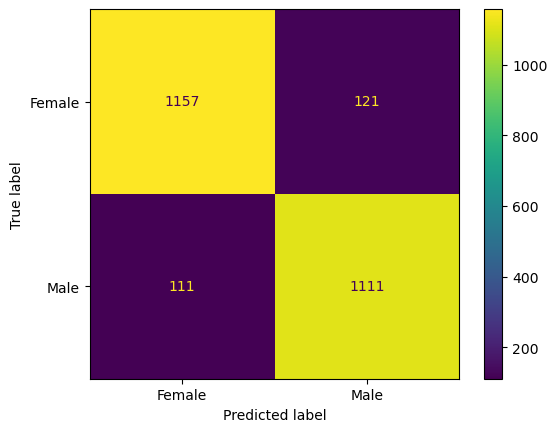

In [65]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred2)

In [67]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

      Female       0.91      0.91      0.91      1278
        Male       0.90      0.91      0.91      1222

    accuracy                           0.91      2500
   macro avg       0.91      0.91      0.91      2500
weighted avg       0.91      0.91      0.91      2500



In [71]:
sc=[]
for i in [3,5,7,9,11]:
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    sc.append(model.score(X_test,y_test))

sc

[0.9024, 0.9072, 0.9124, 0.9152, 0.9184]

Text(0, 0.5, 'score')

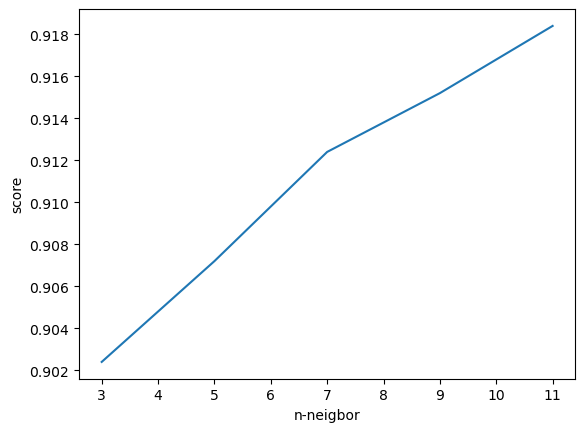

In [75]:
plt.plot([3,5,7,9,11],sc)
plt.xlabel('n-neigbor')
plt.ylabel('score')

[0.9064, 0.9072]


Text(0, 0.5, 'score')

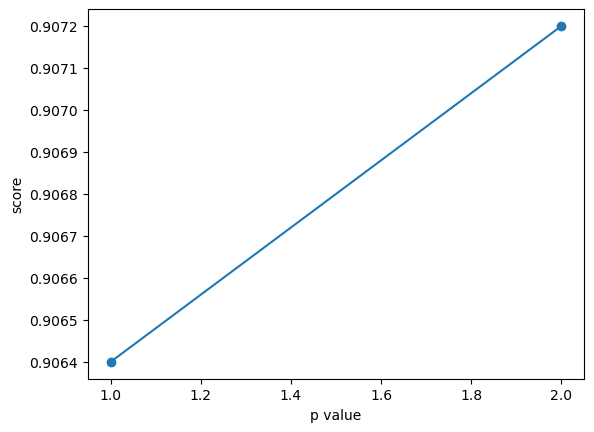

In [79]:
sc=[]
for i in [1,2]:
    model=KNeighborsClassifier(n_neighbors=5,p=i)
    model.fit(X_train,y_train)
    sc.append(model.score(X_test,y_test))

print(sc)

plt.plot([1,2],sc,marker='o')
plt.xlabel('p value')
plt.ylabel('score')